In [1]:
!pip install SimpleITK


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import SimpleITK as sitk
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from os import listdir

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

import cv2

import pickle as pkl

from PIL import Image

In [3]:
write_to_path = "/home/ufh6ft"
t4_data_path = "/project/mlia"

In [4]:
def print_minmax(x):
    print(f"Min = {np.min(x)}, Max = {np.max(x)}")

In [5]:

base_path_inpt = t4_data_path+"/T4_Data/CardiacImage_data/Testing2-withoutlabel/test_images_unlabeled/"


def read_all_files(path):
    X_temp = []
    inp_files = listdir(path)
    print(f"PATH: {path}")
    
    inp_files.sort()
    print(f"Files: {inp_files}")
    
    for f in inp_files:
        img = cv2.imread(path+f, cv2.IMREAD_GRAYSCALE)
        X_temp.append(img)
    return X_temp, inp_files


def match_all_images(X_temp, reference):
    X = []
    for img in X_temp:
        matched = match_histograms(img, reference)
        X.append(matched)
    X = np.array(X)
    return X


X_temp, f1 = read_all_files(base_path_inpt)

print(f"\n\nX len = {len(X_temp)}")

PATH: /project/mlia/T4_Data/CardiacImage_data/Testing2-withoutlabel/test_images_unlabeled/
Files: ['im1.png', 'im10.png', 'im11.png', 'im12.png', 'im13.png', 'im14.png', 'im15.png', 'im16.png', 'im17.png', 'im18.png', 'im19.png', 'im2.png', 'im20.png', 'im21.png', 'im22.png', 'im23.png']


X len = 16


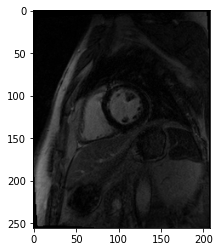

Min = 0, Max = 131


In [6]:
ind = 2
plt.imshow(X_temp[ind], cmap='gray', vmin=0, vmax=255)
plt.show()
print_minmax(X_temp[ind])

X shape after resize= (16, 256, 256)
Min = 0, Max = 129


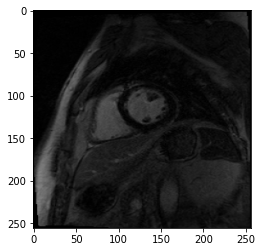

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 18 12  0]
 [ 0  0  0 ... 14 11  0]
 [ 0  0  0 ... 11  8  0]]
Reference shape = (256, 256)
[[ 79  79  79 ...  79  79  79]
 [ 79  79  79 ...  79  79  79]
 [ 79  79  79 ...  79  79  79]
 ...
 [ 79  79  79 ... 108  95  79]
 [ 79  79  79 ... 114 109  79]
 [ 79  79  79 ...  79  79  79]]
Min = 8, Max = 228


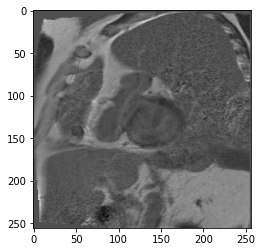

X.shape=(16, 256, 256)
Min = 61, Max = 228


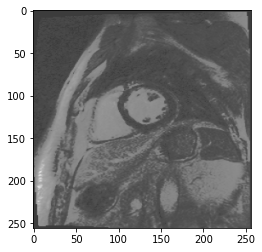

X shape = (16, 256, 256)


In [7]:


X = []

for x in X_temp:
    resized = cv2.resize(x, (256,256), interpolation = cv2.INTER_AREA)
    X.append(resized)
X = np.array(X)
print(f"X shape after resize= {X.shape}")

print_minmax(X[ind])
plt.imshow(X[ind], cmap='gray', vmin=0, vmax=255)
plt.show()

print(X[ind])

writeRefTo = write_to_path+"/mlia/data_imgs_aug/ref_file.png"


refr = cv2.imread(writeRefTo, cv2.IMREAD_GRAYSCALE)

print(f"Reference shape = {refr.shape}")
print(refr)
print("="*50)

print_minmax(refr)
plt.imshow(refr, cmap='gray', vmin=0, vmax=255)
plt.show()


X = match_all_images(X, refr)
X = np.array(X, dtype=int)
print(f"X.shape={X.shape}")

print_minmax(X[ind])
plt.imshow(X[ind], cmap='gray', vmin=0, vmax=255)
plt.show()

print(f"X shape = {X.shape}")


In [8]:


print(f"X shape{X.shape}")
print(type(X[0][0][0]))

X shape(16, 256, 256)
<class 'numpy.int64'>


In [9]:
XbasePath = write_to_path+"/mlia/data_imgs_aug/testNoLabel"


def convert3Channel(x):
    x2 = np.zeros((256, 256, 3))
    for i in range(3):
        x2[:,:,i] = x
    return np.array(x2, dtype=int)
    
ct = 0
for j in range(len(X)):
    ct_ = "0"*(5 - len(str(ct))) + str(ct)
    print(ct_, end=", ")
    x = convert3Channel(X[j])
    
    im = Image.fromarray(x.astype('uint8'))

    im.save(f"{XbasePath}/img_{ct_}.png", format="png")
    
    ct +=1

00000, 00001, 00002, 00003, 00004, 00005, 00006, 00007, 00008, 00009, 00010, 00011, 00012, 00013, 00014, 00015, 

Min = 61, Max = 228


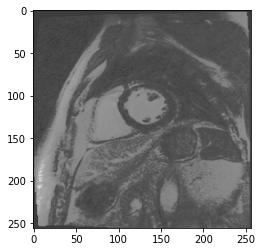

In [10]:
im = cv2.imread(f"{XbasePath}/img_00002.png")
print_minmax(im)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()
